# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></div><div class="lev2 toc-item"><a href="#Before-vs-After-changepoint" data-toc-modified-id="Before-vs-After-changepoint-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Before vs After changepoint</a></div>

# Imports 

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# spikelearn
import os
os.chdir('../../')
import sys
sys.path.append('.')

from spikelearn.data import io, SHORTCUTS
from spikelearn.data.selection import select
from spikelearn.visuals.visuals import raster_multiple, raster_plot

## Before vs After changepoint

In [4]:
savedir = 'data/results/duration/d_prime'
filename = lambda label: '{}_Dprime_cp_init.csv'.format(label)
loaddata = lambda label: pd.read_csv('{}/{}'.format(savedir, filename(label)) )

In [34]:
cp_d

time  trial  before_cp  is_short        fr      cp_d  \
unit after_cp                                                         
0    0        -50.0      1       True     False  1.108718  0.293076   
     1        -50.0    119      False      True  3.330571  0.219500   
1    0        -50.0      1       True     False  1.108718  0.415753   
     1        -50.0    119      False      True  4.713040  0.236515   
4    0        -50.0      1       True     False  1.318732  0.276903   
     1        -50.0    119      False      True  3.662418  0.264631   
5    0        -50.0      1       True     False  0.813031  0.453526   
     1        -50.0    119      False      True  0.807098  0.206833   
6    0        -50.0      1       True     False  1.108718  0.329850   
     1        -50.0    119      False      True  4.290977  0.253225   
7    0        -50.0      1       True     False  1.750055  0.352107   
     1        -50.0    119      False      True  1.551524  0.203974   
8    0        -50.0      1       True     False  1.108718  0.421172   
     1        -50.0    119      False      True  5.349069  0.248604   
9    0        -50.0      1       True     False  1.150364  0.410320   
     1        -50.0    119      False      True  4.367388  0.225390   
10   0        -50.0      1       True     False  1.318732  0.348675   
     1        -50.0    119      False      True  4.626881  0.211391   
11   0        -50.0      1       True     False  1.108718  0.296870   
     1        -50.0    119      False      True  4.501887  0.244089   
12   0        -50.0      1       True     False  1.533404  0.412798   
     1        -50.0    119      False      True  5.432695  0.244659   
13   0        -50.0      1       True     False  1.108718  0.299334   
     1        -50.0    119      False      True  3.958906  0.251059   
14   0        -50.0      1       True     False  0.784290  0.207873   
     1        -50.0    119      False      True  2.742612  0.133529   
15   0        -50.0      1       True     False  1.108718  0.300053   
     1        -50.0    119      False      True  4.090472  0.241697   
16   0        -50.0      1       True     False  1.092051  0.412668   
     1        -50.0    119      False      True  3.502330  0.217817   
...             ...    ...        ...       ...       ...       ...   
78   0        -50.0      1       True     False  0.000000       inf   
     1        -50.0    119      False      True  0.744426  0.103114   
80   0        -50.0      1       True     False  0.000000  0.520241   
     1        -50.0    119      False      True  0.790555  0.120818   
81   0        -50.0      1       True     False  0.000000  0.424400   
     1        -50.0    119      False      True  0.789780  0.233956   
82   0        -50.0      1       True     False  0.602184  0.298300   
     1        -50.0    119      False      True  0.754134  0.357638   
83   0        -50.0      1       True     False  0.602184  0.237588   
     1        -50.0    119      False      True  0.789780  0.308453   
84   0        -50.0      1       True     False  0.602184  0.254175   
     1        -50.0    119      False      True  0.754134  0.240204   
85   0        -50.0      1       True     False  0.602184  0.402082   
     1        -50.0    119      False      True  0.789780  0.305396   
86   0        -50.0      1       True     False  0.000000       inf   
     1        -50.0    119      False      True  0.000000  0.522193   
87   0        -50.0      1       True     False  0.000000       inf   
     1        -50.0    119      False      True  0.000000  0.447970   
88   0        -50.0      1       True     False  0.000000       inf   
     1        -50.0    119      False      True  0.000000  0.628126   
89   0        -50.0      1       True     False  0.000000       inf   
90   0        -50.0      1       True     False  0.000000       inf   
91   0        -50.0      1       True     False  0.000000       inf   
     1        -50.0    119      False  

In [73]:
res.groupby('trial').max().window_d.unstack('trial').transpose().plot()

AttributeError: 'Int64Index' object has no attribute 'labels'

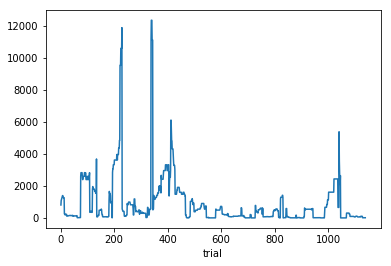

In [87]:
res.replace([np.inf, -np.inf], np.nan).dropna().groupby('trial').max().window_d.plot()

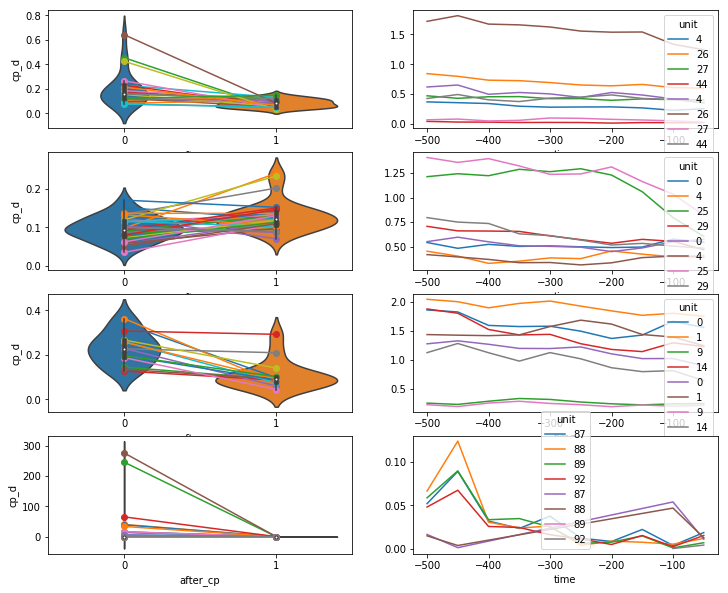

In [195]:
plt.figure(figsize=(12,10))
for i, label in enumerate(SHORTCUTS['groups']['DRRD']):
    res  = loaddata(label).replace([np.inf, -np.inf], np.nan).dropna()
    res['after_cp'] = 1-res['before_cp']
    cp_d = res.drop_duplicates(['unit','time','after_cp']).groupby(['unit','after_cp']).mean()
    
    ax = plt.subplot2grid((4,2), (i, 0))
    cp_d.cp_d.unstack('unit').plot(legend=False, ax=ax,marker='o')
    sns.violinplot(x='after_cp', y='cp_d', data=cp_d.reset_index())
    
    ax = plt.subplot2grid( (4,2), (i, 1) )
    #res.groupby('trial').max().window_d.plot(ax=ax)
    mres = res.groupby(['unit','time']).apply(differ).reset_index().groupby('unit').max()
    units = mres.sort_values(0,ascending=False).reset_index().unit.values[:4]
    res[res.unit.isin(units)].groupby([ 'before_cp','unit', 'time']).mean().fr.unstack('unit').loc[False].plot(ax=ax)
    res[res.unit.isin(units)].groupby([ 'before_cp','unit', 'time']).mean().fr.unstack('unit').loc[True].plot(ax=ax)

In [150]:
def differ(df):
    if df[df['before_cp']==True].cp_d.values.shape[0] == 0 or df[df['before_cp']==False].cp_d.values.shape[0] == 0:
        return 0
    d = df[df['before_cp']==True].cp_d.values[0] - df[df['before_cp']==False].cp_d.values[0]
    return d

In [159]:
res = loaddata('DRRD 8')

In [165]:
mres = res.groupby(['unit','time']).apply(differ).reset_index().groupby('unit').max()
units = mres.sort_values(0,ascending=False).reset_index().unit.values[:4]

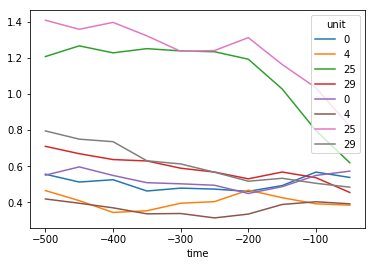

In [192]:

ax=plt.subplot(1,1,1)
res[res.unit.isin(units)].groupby([ 'before_cp','unit', 'time']).mean().fr.unstack('unit').loc[False].plot(ax=ax)
res[res.unit.isin(units)].groupby([ 'before_cp','unit', 'time']).mean().fr.unstack('unit').loc[True].plot(ax=ax)

In [105]:
cp_d.reset_index().groupby(['unit','time']).diff()

,after_cp,before_cp,cp_d,fr,is_short,trial,window_d
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,True,-0.073576,2.221853,True,118.0,-0.012503
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,True,-0.179238,3.604322,True,118.0,0.091606
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,True,-0.012272,2.343686,True,118.0,0.101802
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.0,True,-0.246693,-0.005933,True,118.0,-0.177283
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,True,-0.076625,3.182259,True,118.0,0.030609
